# Geopandas

In [1]:
import geopandas as gpd

In [2]:
filename = 'wijkenbuurten_2024_v1.gpkg'

In [11]:
gemeenten = gpd.read_file(filename, layer='gemeenten')

In [12]:
gemeenten.head()

,gemeentecode,gemeentenaam,indelingswijziging_wijken_en_buurten,water,omgevingsadressendichtheid,stedelijkheid_adressen_per_km2,bevolkingsdichtheid_inwoners_per_km2,aantal_inwoners,mannen,vrouwen,...,afstand_tot_open_nat_natuurlijk_terrein,afstand_tot_semiopenbaar_groen_totaal,afstand_tot_sportterrein,afstand_tot_volkstuin,afstand_tot_verblijfsrecreatief_terrein,afstand_tot_recreatief_binnenwater,afstand_tot_begraafplaats,jrstatcode,jaar,geometry
0,GM0998,Buitenland,-99997,B,-99997,-99997,-99997,-99997,-99997,-99997,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM0998,2024,"MULTIPOLYGON (((123629.78 379674.57, 123627.21..."
1,GM0034,Almere,-99997,JA,-99997,-99997,-99997,-99997,-99997,-99997,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM0034,2024,"MULTIPOLYGON (((150087.299 479382.379, 150000...."
2,GM0050,Zeewolde,-99997,JA,-99997,-99997,-99997,-99997,-99997,-99997,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM0050,2024,"MULTIPOLYGON (((155047.32 474836.246, 155049.0..."
3,GM0060,Ameland,-99997,JA,-99997,-99997,-99997,-99997,-99997,-99997,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM0060,2024,"MULTIPOLYGON (((196000 608000, 195250 607500, ..."
4,GM0072,Harlingen,-99997,JA,-99997,-99997,-99997,-99997,-99997,-99997,...,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,-99995.0,2024GM0072,2024,"MULTIPOLYGON (((158000 581000, 158331.38 58046..."


In [16]:
for col in gemeenten.columns:
    print(col)

gemeentecode
gemeentenaam
indelingswijziging_wijken_en_buurten
water
omgevingsadressendichtheid
stedelijkheid_adressen_per_km2
bevolkingsdichtheid_inwoners_per_km2
aantal_inwoners
mannen
vrouwen
percentage_personen_0_tot_15_jaar
percentage_personen_15_tot_25_jaar
percentage_personen_25_tot_45_jaar
percentage_personen_45_tot_65_jaar
percentage_personen_65_jaar_en_ouder
percentage_ongehuwd
percentage_gehuwd
percentage_gescheid
percentage_verweduwd
geboorte_totaal
geboortes_per_1000_inwoners
sterfte_totaal
sterfte_relatief
aantal_huishoudens
percentage_eenpersoonshuishoudens
percentage_huishoudens_zonder_kinderen
percentage_huishoudens_met_kinderen
gemiddelde_huishoudsgrootte
percentage_met_herkomstland_nederland
percentage_met_herkomstland_uit_europa_excl_nl
percentage_met_herkomstland_buiten_europa
percentage_geb_in_nl_met_herkomstland_nederland
perc_geb_in_nl_met_herkomstland_in_europa_ex_nl
perc_geb_in_nl_met_herkomstland_buiten_europa
perc_geb_buiten_nl_met_herkomstlnd_in_europa_ex_n

<Axes: >

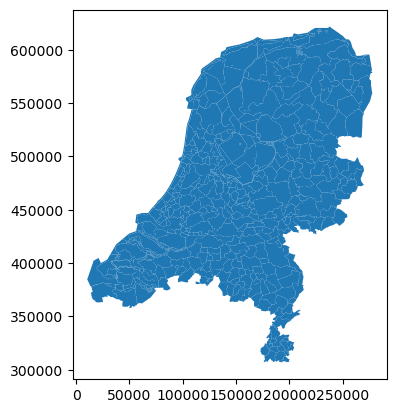

In [17]:
gemeenten.plot()

In [18]:
gemeenten['water'].value_counts()

water
NEE    342
JA      81
B        1
Name: count, dtype: int64

In [25]:
gemeenten = gemeenten.query('water=="NEE"').copy()

In [26]:
gemeenten['water'].value_counts()

water
NEE    342
Name: count, dtype: int64

<Axes: >

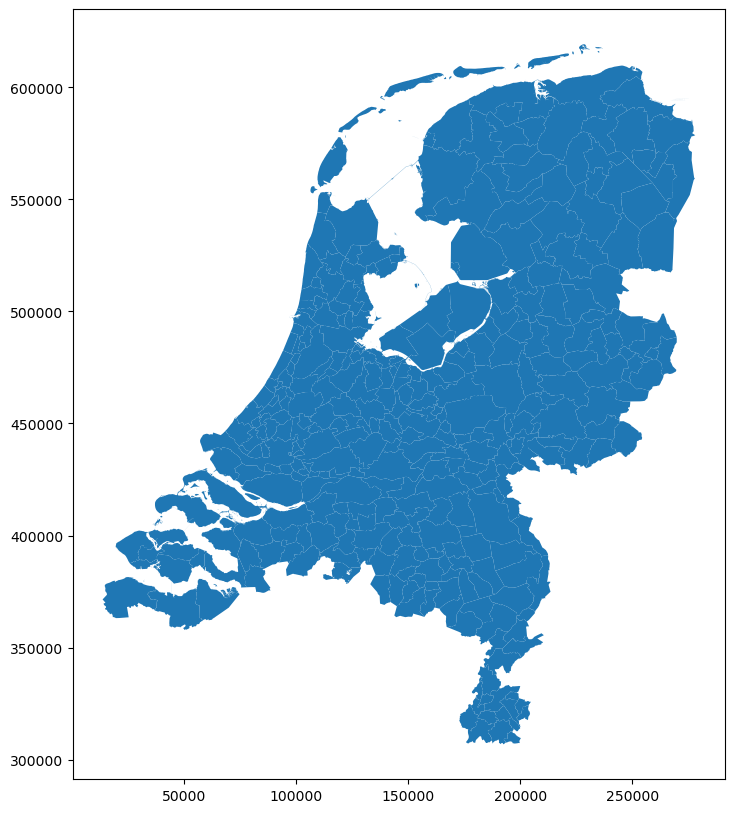

In [27]:
gemeenten.plot(figsize=(10, 10))

<Axes: >

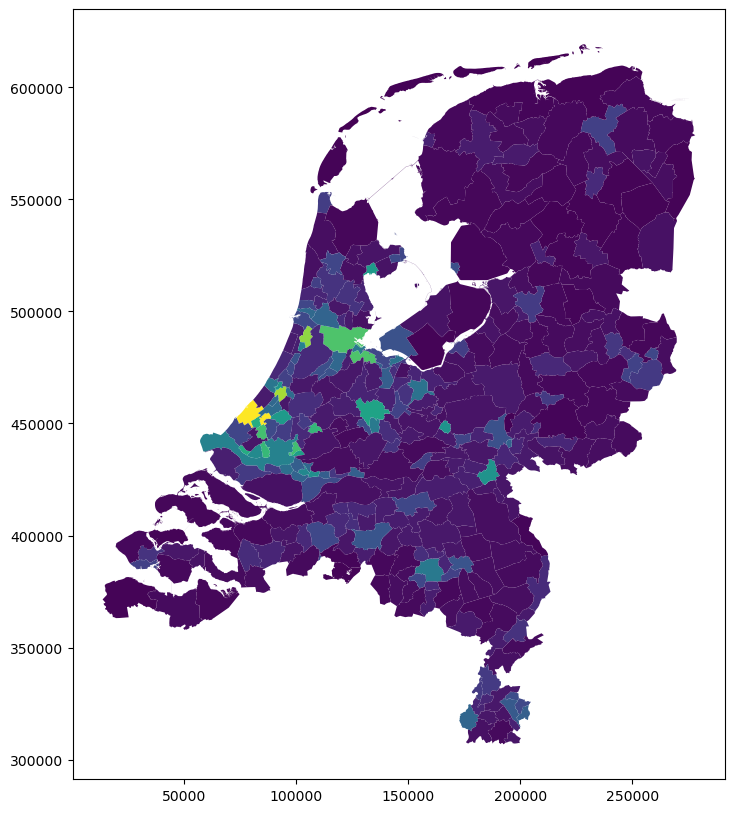

In [28]:
gemeenten.plot(column='bevolkingsdichtheid_inwoners_per_km2', figsize=(10, 10))

In [29]:
gemeenten['man_vrouw'] = gemeenten['mannen'] / gemeenten['vrouwen']

<Axes: >

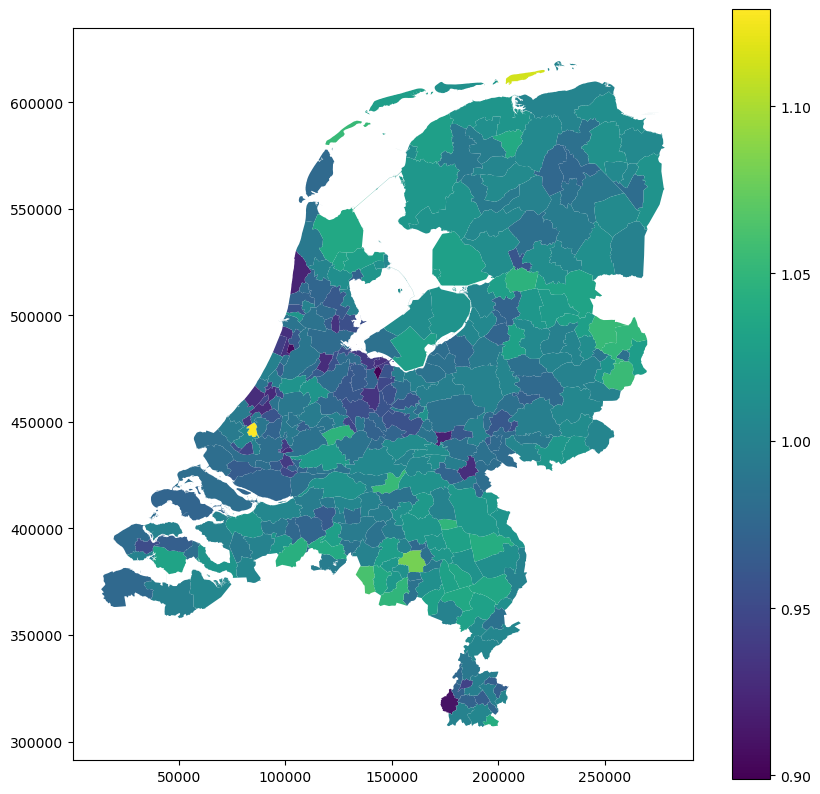

In [31]:
gemeenten.plot(column='man_vrouw', figsize=(10, 10), legend=True)

In [35]:
gemeenten.sort_values('man_vrouw', ascending=False).head(10)[['gemeentenaam','man_vrouw']]

,gemeentenaam,man_vrouw
225,Delft,1.128990
94,Schiermonnikoog,1.113043
283,Eindhoven,1.080592
348,Reusel-De Mierden,1.062120
108,Enschede,1.054442
120,Tubbergen,1.054046
97,Vlieland,1.054010
145,Maasdriel,1.053539
380,Dinkelland,1.050222
369,Bergeijk,1.049760


In [36]:
gemeenten.sort_values('man_vrouw', ascending=True).head(10)[['gemeentenaam','man_vrouw']]

,gemeentenaam,man_vrouw
207,Laren (NH.),0.898904
200,Heemstede,0.905331
321,Maastricht,0.909803
156,Wageningen,0.919962
189,Bergen (NH.),0.921181
236,Leiden,0.926641
397,Leidschendam-Voorburg,0.927107
254,Wassenaar,0.927865
235,Krimpen aan den IJssel,0.928399
187,Amstelveen,0.928435


In [40]:
gemeenten.sort_values('man_vrouw', ascending=False).head(10).explore()